# Validation of ECMWF ERA5 model runs CCI satellite SST

In [ ]:
import iris
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import iris.coord_categorisation
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


In [ ]:
def extract_region(cube,lon_west,lon_east,lat_south,lat_north):
    cube_region_tmp = cube.intersection(longitude=(lon_west, lon_east))
    cube_region = cube_region_tmp.intersection(latitude=(lat_south, lat_north))
    return cube_region


def area_avg(cube):
    try:
        cube.coord('latitude').guess_bounds()
    except:
        pass
    try:
        cube.coord('longitude').guess_bounds()
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(cube)
    return cube.collapsed(['longitude', 'latitude'], iris.analysis.MEAN, weights=grid_areas)

In [ ]:
file = '/Users/ph290/Downloads/era5_GBR/era5_GBR_surfacetemperature_ym.nc'
file_bottom = '/Users/ph290/Downloads/era5_GBR/era5_GBR_bottomtemperature_all_ym.nc'

# file = '/Users/ph290/Downloads/global_tropics/surface_temperature_global_tropics_era5_year_mean_mv.nc'
# file = '/Users/ph290/Downloads/global_tropics/surface_temperature_global_tropics_era5.nc'
year_for_basic_comparison = 2010
years_for_comparison = [1986,2006]

In [ ]:
# obs_cube = iris.load_cube('/Users/ph290/Downloads/global_tropics/coraltemp_v1.0_19890101.nc','sea_surface_temperature')[0]
# obs_cube = iris.load_cube('/Users/ph290/Downloads/global_tropics/coraltemp_v1.0_1989.nc','sea_surface_temperature')
obs_cube_all = iris.load_cube('/Users/ph290/Downloads/global_tropics/ESACCI-L4_GHRSST-SSTdepth-OSTIA-GLOB_CDR2.0-v02.0-fv01.0_regridded_yearmean.nc')
obs_cube_all -= 273.15
# obs_cube = iris.load_cube('/Users/ph290/Downloads/global_tropics/coraltemp_v1.0_2008_all_tm.nc','sea_surface_temperature')

In [ ]:
obs_cube_all = obs_cube_all
try:
    iris.coord_categorisation.add_year(obs_cube_all, 'time', name='year')
except:
    pass

print obs_cube_all.coord('year').points

# obs_cube = obs_cube_all[np.where(obs_cube_all.coord('year').points == year_for_basic_comparison)]
obs_cube = obs_cube_all[np.where((obs_cube_all.coord('year').points >= years_for_comparison[0]) & (obs_cube_all.coord('year').points <= years_for_comparison[1]))]

obs_cube = obs_cube.collapsed('time',iris.analysis.MEAN)
# obs_cube = obs_cube_all[np.where(obs_cube_all.coord('year').points == year_for_basic_comparison)]



In [ ]:
# cube = iris.load_cube(file)[0]

cube_all = iris.load_cube(file)
try:
    iris.coord_categorisation.add_year(cube_all, 'time', name='year')
except:
    pass

cube_all = cube_all.aggregated_by('year', iris.analysis.MEAN)


# cube_all.coord('longitude').points = cube_all.coord('longitude').points+180
# cube_all.data = np.ma.masked_array(cube_all.data)
# cube_all.data.fill_value = 9.96920997e+36
cube_all.data = np.ma.masked_where(cube_all.data == 9.96920997e+36, cube_all.data)
# iris.coord_categorisation.add_year(cube_all, 'time', name='year')
# cube = cube_all[np.where(cube_all.coord('year').points == year_for_basic_comparison)]
cube = cube_all[np.where((cube_all.coord('year').points >= years_for_comparison[0]) & (cube_all.coord('year').points <= years_for_comparison[1]))]

cube = cube.collapsed('time',iris.analysis.MEAN)

In [ ]:
cube.coord('longitude')


In [ ]:
cube_all_bottom = iris.load_cube(file_bottom)
try:
    iris.coord_categorisation.add_year(cube_all_bottom, 'time', name='year')
except:
    pass

cube_all_bottom = cube_all_bottom.aggregated_by('year', iris.analysis.MEAN)
cube_all_bottom.data = np.ma.masked_where(cube_all_bottom.data == 9.96920997e+36, cube_all_bottom.data)
# cube_bottom = cube_all_bottom[np.where(cube_all_bottom.coord('year').points == year_for_basic_comparison)]
# cube_bottom = cube_bottom.collapsed('time',iris.analysis.MEAN)

In [ ]:
# cube = iris.load_cube(file)
# cube.coord('longitude').points = cube.coord('longitude').points+180
# cube = cube.collapsed('time',iris.analysis.MEAN)

In [ ]:
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

In [ ]:
cube_0 = cube.copy()
cube_0_data = cube_0.data
lat = cube_0.coord('latitude').points
lon = cube_0.coord('longitude').points

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 3, 1, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon, lat,cube_0_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='plasma')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_50m, edgecolor='gray')

#########

lon_west = 142
lon_east = 156
lat_south = -29
lat_north = -10

obs_cube_region = extract_region(obs_cube,lon_west,lon_east,lat_south,lat_north)

obs_cube_data = obs_cube_region.data
lat2 = obs_cube_region.coord('latitude').points
lon2 = obs_cube_region.coord('longitude').points

ax = fig.add_subplot(1, 3, 2, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon2, lat2,obs_cube_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='plasma')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_50m, edgecolor='gray')
cbar = plt.colorbar(p,orientation='horizontal')
cbar.set_label('$^{\circ}$C')
####

ax = fig.add_subplot(1, 3, 3, projection=ccrs.PlateCarree())

p = ax.pcolormesh(lon2, lat2,obs_cube_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='plasma')
p = ax.pcolormesh(lon, lat,cube_0_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='plasma')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_50m, edgecolor='gray')

# plt.gca().coastlines('10m')

plt.savefig('/Users/ph290/Documents/HalloranSync/documents/figures/GBR_s2p3.png',dpi=600)
plt.show()

## Directly comparing model and satellite on common grids (regridding model to satellite grid)

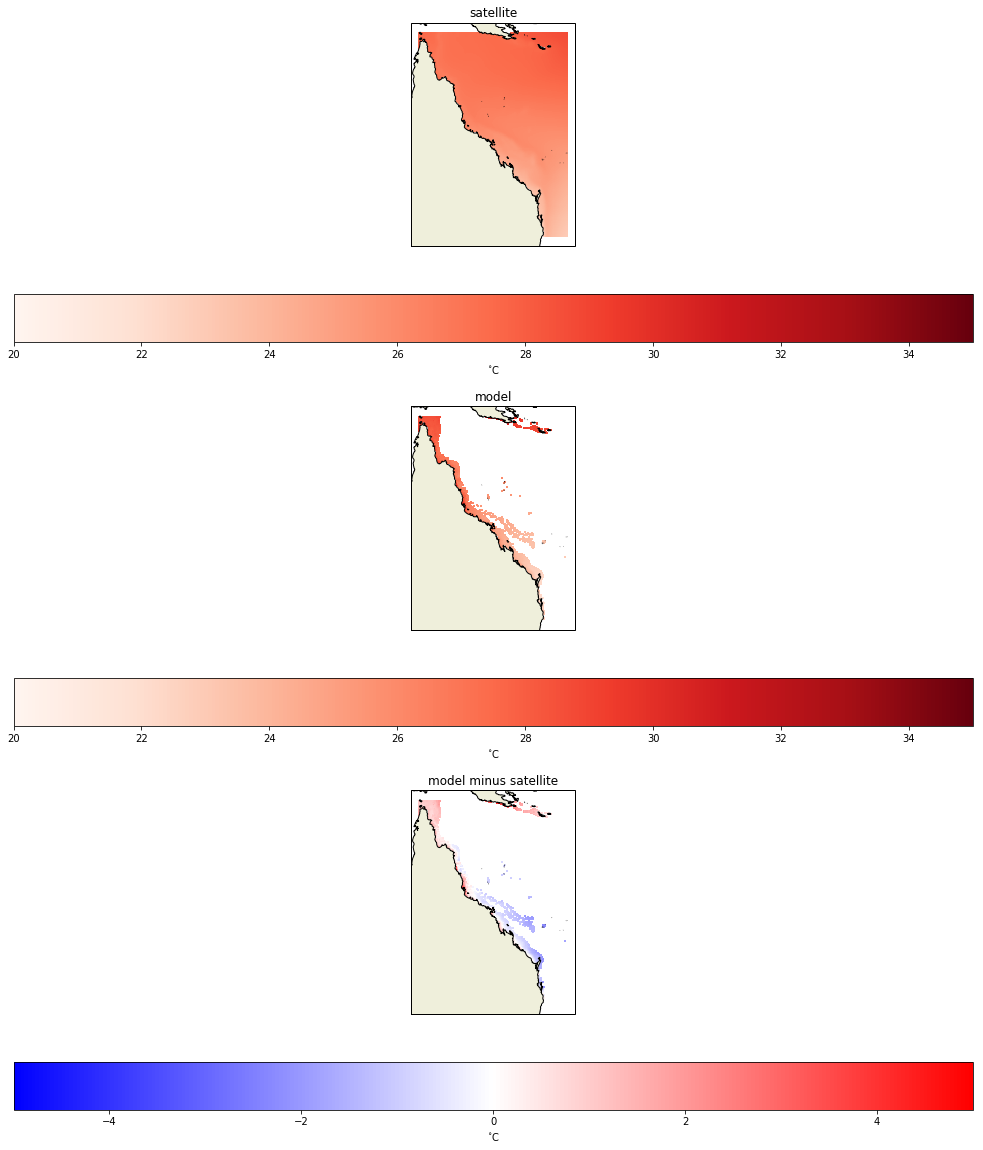

In [39]:
lon_west = 142
lon_east = 156
lat_south = -29
lat_north = -10



c_model = extract_region(cube,lon_west,lon_east,lat_south,lat_north)
# c_model.coord('longitude').points = c_model.coord('longitude').points + 180

c_crw_region = extract_region(obs_cube,lon_west,lon_east,lat_south,lat_north)

c_model.coord('latitude').coord_system = c_crw_region.coord('latitude').coord_system
c_model.coord('longitude').coord_system =c_crw_region.coord('longitude').coord_system

c_crw_region_regridded = c_crw_region.regrid(c_model, iris.analysis.Linear())
# obs_cube_all_region.data.mask = obs_cube_all_region_regridded.data.mask

model_data = c_model.data
lat_model = c_model.coord('latitude').points
lon_model = c_model.coord('longitude').points


crw_data = c_crw_region_regridded.data
lat_crw = c_crw_region_regridded.coord('latitude').points
lon_crw = c_crw_region_regridded.coord('longitude').points

fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(3, 1, 1, projection=ccrs.PlateCarree())
p1 = ax1.pcolormesh(lon_crw, lat_crw,crw_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='Reds')
cbar = plt.colorbar(p1,orientation='horizontal')
cbar.set_label('$^{\circ}$C')

ax2 = fig.add_subplot(3, 1, 2, projection=ccrs.PlateCarree())
p2 = ax2.pcolormesh(lon_crw, lat_crw,model_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='Reds')
cbar = plt.colorbar(p2,orientation='horizontal')
cbar.set_label('$^{\circ}$C')

ax3 = fig.add_subplot(3, 1, 3, projection=ccrs.PlateCarree())

# p3 = ax3.pcolormesh(lon_crw, lat_crw,np.roll(model_data,np.shape(model_data)[1]/2,axis=1) - crw_data,
p3 = ax3.pcolormesh(lon_crw, lat_crw,model_data - crw_data,
                transform=ccrs.PlateCarree(),vmin=-5,vmax=5,
                cmap='bwr')
cbar = plt.colorbar(p3,orientation='horizontal')
cbar.set_label('$^{\circ}$C')

ax1.add_feature(land_10m, edgecolor='k')
ax2.add_feature(land_10m, edgecolor='k')
ax3.add_feature(land_10m, edgecolor='k')

ax1.title.set_text('satellite')
ax2.title.set_text('model')
ax3.title.set_text('model minus satellite')



plt.show()

basically we've got to the point where the areas where it is hot/cold relate to warm/cold currents. In warm conditions where density is ~linaerly dependent on temperature this is probably not an issue, and we can be confident in the variability, but at high latitudes, one would probably want to corrent the temperatures to ensure the density was responding appropriately to variability. In future runs, if theer was evidence that that there was a chnge in teh large-scale currents feeding an area, that could also be factored in, based on the assumption that the difference between the ECMWF run and observed SST.

In [ ]:
from IPython.display import Image
Image(filename='/Users/ph290/Downloads/global_tropics/ocean-systems-world.jpg') 

## Model minus CCI satellite SST with depth plotted as contours

Comparison of annual mean for year specified at the top of the page

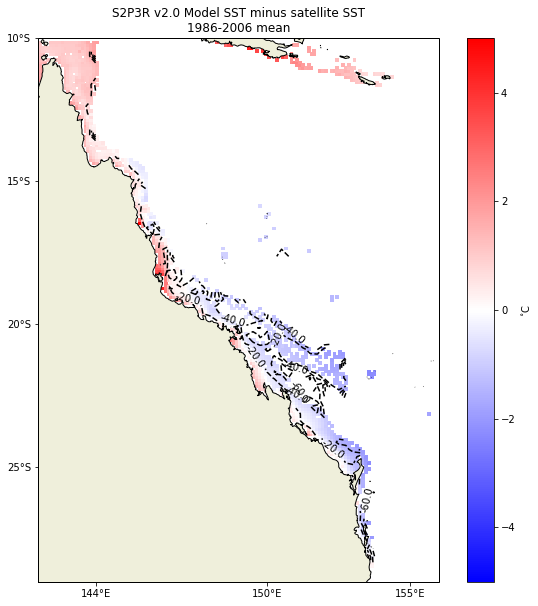

In [29]:
bathy_file = '/Users/ph290/Downloads/ETOPO1_Bed_g_gmt4_low_res.nc'
bathy_cube = iris.load_cube(bathy_file)
bathy_cube.data = np.ma.masked_where(bathy_cube.data >= 0.0,bathy_cube.data)
bathy_cube.data = np.ma.masked_where(bathy_cube.data < -100.0,bathy_cube.data)



lon_west = 142
lon_east = 156
lat_south = -29
lat_north = -10

bathy_cube = extract_region(bathy_cube,lon_west,lon_east,lat_south,lat_north)

bathy_data = bathy_cube.data
lat_bathy = bathy_cube.coord('latitude').points
lon_bathy = bathy_cube.coord('longitude').points

lon_west2 = 142
lon_east2 = 156
lat_south2 = -29
lat_north2 = -10

plt.close('all')
fig = plt.figure(figsize=(10, 10))
ax3 = plt.axes(projection=ccrs.PlateCarree())
ax3.set_extent((lon_west2, lon_east2, lat_south2, lat_north2), crs=ccrs.PlateCarree())

# ax3 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

CS = ax3.contour(lon_bathy, lat_bathy,bathy_data,4,colors = 'k')
ax3.clabel(CS, CS.levels, inline=True, fmt=r'%r', fontsize=10)

p3 = ax3.pcolormesh(lon_crw, lat_model,model_data - crw_data,
                transform=ccrs.PlateCarree(),vmin=-5,vmax=5,
                cmap='bwr')
cbar = plt.colorbar(p3,orientation='vertical')
cbar.set_label('$^{\circ}$C')


ax3.add_feature(land_10m, edgecolor='k')

ax3.title.set_text('S2P3R v2.0 Model SST minus satellite SST\n1986-2006 mean')

ax3.set_xticks([144,150,155], crs=ccrs.PlateCarree())
ax3.set_yticks([-25,-20,-15,-10], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax3.xaxis.set_major_formatter(lon_formatter)
ax3.yaxis.set_major_formatter(lat_formatter)

plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/gbr_sst_validation_map.png',dpi=300)


## GBR timeseries comparison model v. CCI

In [30]:
def compariable_across_grids(cube1,cube2,lon_west,lon_east,lat_south,lat_north):
    cube1_region = extract_region(cube1,lon_west,lon_east,lat_south,lat_north)
    cube2_region = extract_region(cube2,lon_west,lon_east,lat_south,lat_north)
    
    cube2_region.coord('latitude').coord_system = cube1_region.coord('latitude').coord_system
    cube2_region.coord('longitude').coord_system =cube1_region.coord('longitude').coord_system

    cube1_region_regridded = cube1_region.regrid(cube2_region, iris.analysis.Linear())
    cube2_region.data.mask = cube1_region_regridded.data.mask


    cube2_region.data[np.where(cube2_region.data < -20.0)] = cube2_region.data.fill_value
    cube2_region.data[np.where(cube2_region.data >100.0)] = cube2_region.data.fill_value
    cube2_region.data = np.ma.masked_where(cube2_region.data == cube2_region.data.fill_value, cube2_region.data)

    cube1_region_regridded.data[np.where(cube1_region_regridded.data < -20.0)] = cube1_region_regridded.data.fill_value
    cube1_region_regridded.data[np.where(cube1_region_regridded.data > 100.0)] = cube1_region_regridded.data.fill_value
    cube1_region_regridded.data = np.ma.masked_where(cube1_region_regridded.data == cube1_region_regridded.data.fill_value, cube1_region_regridded.data)
    return cube1_region_regridded,cube2_region

In [31]:
model_region_regridded,obs_region = compariable_across_grids(cube_all,obs_cube_all,142,156,-29,-10)
model_bottom_region_regridded,obs_region = compariable_across_grids(cube_all_bottom,obs_cube_all,142,156,-29,-10)


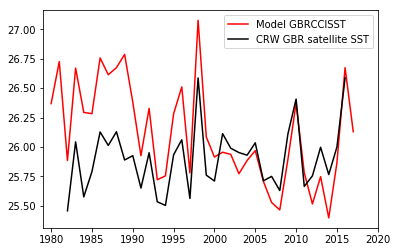

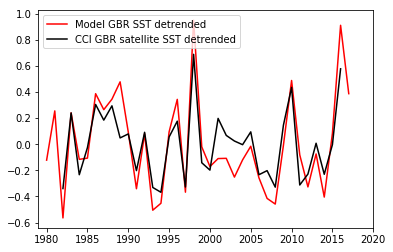

In [32]:
import scipy
import matplotlib.pyplot as plt
from scipy import signal


def select_range(cube, my_range):
    return cube[np.where((cube.coord('year').points > my_range[0]) & (cube.coord('year').points < my_range[1]))]

cube_all_region_area_avg = area_avg(model_region_regridded)
obs_cube_all_region_area_avg = area_avg(obs_region)

cube_all_region_area_avg_bottom = area_avg(model_bottom_region_regridded)


plotting_range = [1979,2018]
cube_all_region_area_avg = select_range(cube_all_region_area_avg, plotting_range)
obs_cube_all_region_area_avg = select_range(obs_cube_all_region_area_avg, plotting_range)

cube_all_region_area_avg_bottom = select_range(cube_all_region_area_avg_bottom, plotting_range)


# fig, ax1 = plt.subplots()

# ax1.plot(cube_all_region_area_avg.coord('year').points,cube_all_region_area_avg.data,'r',label='Model GBR SST')

# # ax2 = ax1.twinx() 

# ax.plot(obs_cube_all_region_area_avg.coord('year').points,obs_cube_all_region_area_avg.data,'k',label='CRW GBR satellite SST')

# ax1.set_xlim([2003,2017])
# plt.legend()
# plt.show()


fig, ax1 = plt.subplots()

ax1.plot(cube_all_region_area_avg.coord('year').points,cube_all_region_area_avg.data,'r',label='Model GBRCCISST')
ax1.plot(obs_cube_all_region_area_avg.coord('year').points,obs_cube_all_region_area_avg.data,'k',label='CRW GBR satellite SST')
# ax1.plot(cube_all_region_area_avg_bottom.coord('year').points,cube_all_region_area_avg_bottom.data,'g',label='Model GBR bottom temperature')

ax1.set_xlim([1979,2020])
plt.legend()
plt.show()


fig, ax1 = plt.subplots()

ax1.plot(cube_all_region_area_avg.coord('year').points,signal.detrend(cube_all_region_area_avg.data),'r',label='Model GBR SST detrended')
ax1.plot(obs_cube_all_region_area_avg.coord('year').points,signal.detrend(obs_cube_all_region_area_avg.data),'k',label='CCI GBR satellite SST detrended')
# ax1.plot(cube_all_region_area_avg_bottom.coord('year').points,cube_all_region_area_avg_bottom.data,'g',label='Model GBR bottom temperature')

ax1.set_xlim([1979,2020])
plt.legend()
plt.show()



*thoughts:* is the model drifting to the right temperature after a long spinup stage? Start the run earlier and/or change the initialisation temperature and re-run.

## plotting by GBRMBA region
NORTHERN SECTOR includes all the reefs to the north of latitude 16S
CENTRAL SECTOR includes the area from 16S to 21S
SOUTHERN SECTOR includes the area from 21S to 24S
http://www.gbrmpa.gov.au/__data/assets/pdf_file/0019/4906/mp_009_full.pdf

In [33]:
def common_years(cube1,cube2):
    cube1_yrs = cube1.coord('year').points
    cube2_yrs = cube2.coord('year').points
    years= np.intersect1d(cube1_yrs,cube2_yrs)
    cube1_ind= np.in1d(cube1_yrs,cube2_yrs)
    cube2_ind= np.in1d(cube2_yrs,cube1_yrs)
    return years,cube1.data[cube1_ind],cube2.data[cube2_ind]




(1980, 1982, 1992, 1994, 1998, 2002, 2006, 2017.0)

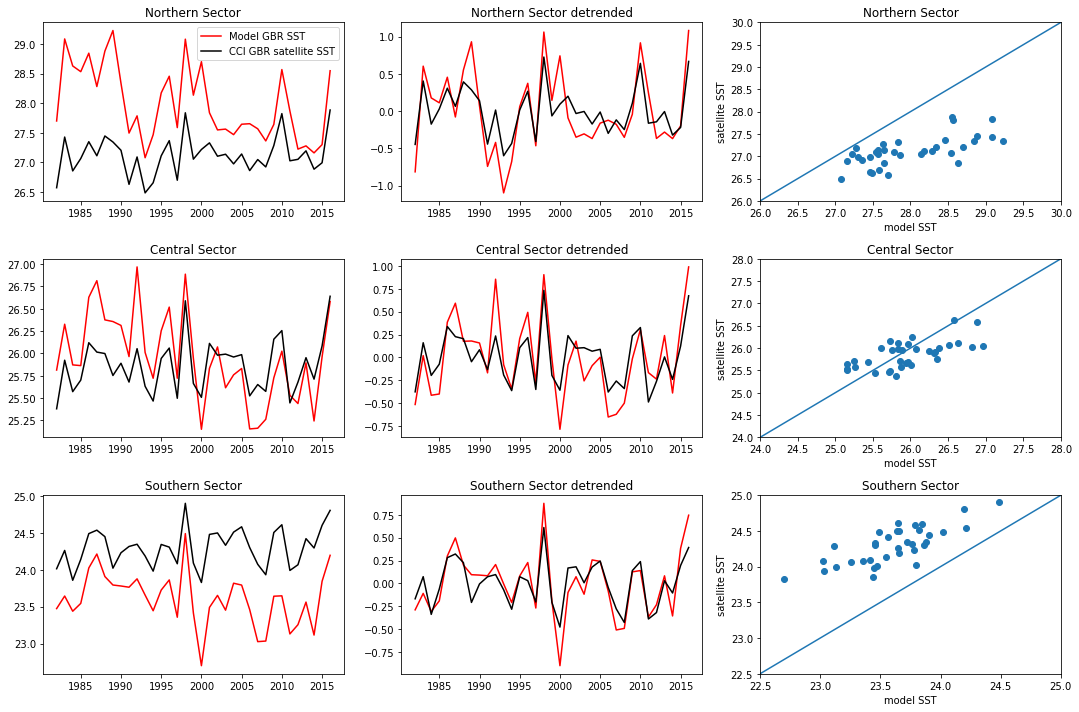

In [34]:

def select_range(cube, my_range):
    return cube[np.where((cube.coord('year').points > my_range[0]) & (cube.coord('year').points < my_range[1]))]

lon_west = 142
lon_east = 156
lat_south = -16
lat_north = -10
cube_all_region_area_avg_N = area_avg(extract_region(model_region_regridded,lon_west,lon_east,lat_south,lat_north))
obs_cube_all_region_area_avg_N = area_avg(extract_region(obs_region,lon_west,lon_east,lat_south,lat_north))
lat_south = -21
lat_north = -16
cube_all_region_area_avg_C = area_avg(extract_region(model_region_regridded,lon_west,lon_east,lat_south,lat_north))
obs_cube_all_region_area_avg_C = area_avg(extract_region(obs_region,lon_west,lon_east,lat_south,lat_north))
lat_south = -29
lat_north = -21
cube_all_region_area_avg_S = area_avg(extract_region(model_region_regridded,lon_west,lon_east,lat_south,lat_north))
obs_cube_all_region_area_avg_S = area_avg(extract_region(obs_region,lon_west,lon_east,lat_south,lat_north))





fig,axes= plt.subplots(nrows=3, ncols=3,figsize=(15, 10))

yr,y1,y2 = common_years(cube_all_region_area_avg_N,obs_cube_all_region_area_avg_N)

axes[0,0].plot(yr,y1,'r',label='Model GBR SST')
axes[0,0].plot(yr,y2,'k',label='CCI GBR satellite SST')
axes[0,0].set_title('Northern Sector')

axes[0,1].plot(yr,signal.detrend(y1),'r',label='Model GBR SST')
axes[0,1].plot(yr,signal.detrend(y2),'k',label='CCI GBR satellite SST')
axes[0,1].set_title('Northern Sector detrended')

axes[0,2].scatter(y1,y2,label='Model GBR SST v. satellite SST')
axes[0,2].set_xlabel('model SST')
axes[0,2].set_ylabel('satellite SST')
axes[0,2].plot([0,100],[0,100])
axes[0,2].set_xlim([26.0,30.0])
axes[0,2].set_ylim([26.0,30.0])
axes[0,2].set_title('Northern Sector')

yr,y1,y2 = common_years(cube_all_region_area_avg_C,obs_cube_all_region_area_avg_C)

axes[1,0].plot(yr,y1,'r',label='Model GBR SST')
axes[1,0].plot(yr,y2,'k',label='CCI GBR satellite SST')
axes[1,0].set_title('Central Sector')

axes[1,1].plot(yr,signal.detrend(y1),'r',label='Model GBR SST')
axes[1,1].plot(yr,signal.detrend(y2),'k',label='CCI GBR satellite SST')
axes[1,1].set_title('Central Sector detrended')

axes[1,2].scatter(y1,y2,label='Model GBR SST v. satellite SST')
axes[1,2].set_xlabel('model SST')
axes[1,2].set_ylabel('satellite SST')
axes[1,2].plot([0,100],[0,100])
axes[1,2].set_xlim([24.0,28.0])
axes[1,2].set_ylim([24.0,28.0])
axes[1,2].set_title('Central Sector')

yr,y1,y2 = common_years(cube_all_region_area_avg_S,obs_cube_all_region_area_avg_S)

axes[2,0].plot(yr,y1,'r',label='Model GBR SST')
axes[2,0].plot(yr,y2,'k',label='CCI GBR satellite SST')
axes[2,0].set_title('Southern Sector')

axes[2,1].plot(yr,signal.detrend(y1),'r',label='Model GBR SST')
axes[2,1].plot(yr,signal.detrend(y2),'k',label='CCI GBR satellite SST')
axes[2,1].set_title('Southern Sector detrended')

axes[2,2].scatter(y1,y2,label='Model GBR SST v. satellite SST')
axes[2,2].set_xlabel('model SST')
axes[2,2].set_ylabel('satellite SST')
axes[2,2].plot([0,100],[0,100])
axes[2,2].set_xlim([22.5,25.0])
axes[2,2].set_ylim([22.5,25.0])
axes[2,2].set_title('Southern Sector')

axes[0,0].legend(fancybox=True)

plt.tight_layout()
1980, 1982, 1992, 1994, 1998, 2002, 2006, 2016 and 2017.


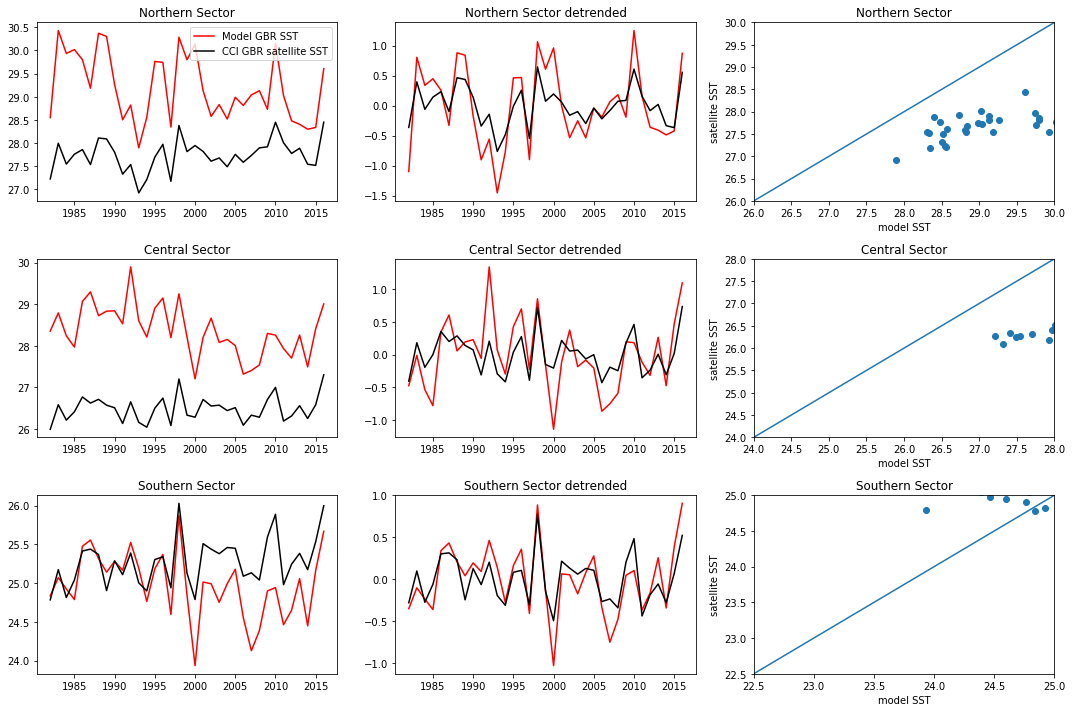

In [35]:
def area_max(cube):
    try:
        cube.coord('latitude').guess_bounds()
    except:
        pass
    try:
        cube.coord('longitude').guess_bounds()
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(cube)
    return cube.collapsed(['longitude', 'latitude'], iris.analysis.PERCENTILE, percent=[95])

def select_range(cube, my_range):
    return cube[np.where((cube.coord('year').points > my_range[0]) & (cube.coord('year').points < my_range[1]))]

def get_axis_limits(ax, xscale=.45, yscale=.95):
    return ax.get_xlim()[1]*xscale, ax.get_ylim()[1]*yscale


lon_west = 142
lon_east = 156
lat_south = -16
lat_north = -10
cube_all_region_area_avg_N = area_max(extract_region(model_region_regridded,lon_west,lon_east,lat_south,lat_north))
obs_cube_all_region_area_avg_N = area_max(extract_region(obs_region,lon_west,lon_east,lat_south,lat_north))
lat_south = -21
lat_north = -16
cube_all_region_area_avg_C = area_max(extract_region(model_region_regridded,lon_west,lon_east,lat_south,lat_north))
obs_cube_all_region_area_avg_C = area_max(extract_region(obs_region,lon_west,lon_east,lat_south,lat_north))
lat_south = -29
lat_north = -21
cube_all_region_area_avg_S = area_max(extract_region(model_region_regridded,lon_west,lon_east,lat_south,lat_north))
obs_cube_all_region_area_avg_S = area_max(extract_region(obs_region,lon_west,lon_east,lat_south,lat_north))





fig,axes= plt.subplots(nrows=3, ncols=3,figsize=(15, 10))

yr,y1,y2 = common_years(cube_all_region_area_avg_N,obs_cube_all_region_area_avg_N)

axes[0,0].plot(yr,y1,'r',label='Model GBR SST')
axes[0,0].plot(yr,y2,'k',label='CCI GBR satellite SST')
axes[0,0].set_title('Northern Sector')

axes[0,1].plot(yr,signal.detrend(y1),'r',label='Model GBR SST')
axes[0,1].plot(yr,signal.detrend(y2),'k',label='CCI GBR satellite SST')
axes[0,1].set_title('Northern Sector detrended')

axes[0,2].scatter(y1,y2,label='Model GBR SST v. satellite SST')
axes[0,2].set_xlabel('model SST')
axes[0,2].set_ylabel('satellite SST')
axes[0,2].plot([0,100],[0,100])
axes[0,2].set_xlim([26.0,30.0])
axes[0,2].set_ylim([26.0,30.0])
axes[0,2].set_title('Northern Sector')

yr,y1,y2 = common_years(cube_all_region_area_avg_C,obs_cube_all_region_area_avg_C)

axes[1,0].plot(yr,y1,'r',label='Model GBR SST')
axes[1,0].plot(yr,y2,'k',label='CCI GBR satellite SST')
axes[1,0].set_title('Central Sector')

axes[1,1].plot(yr,signal.detrend(y1),'r',label='Model GBR SST')
axes[1,1].plot(yr,signal.detrend(y2),'k',label='CCI GBR satellite SST')
axes[1,1].set_title('Central Sector detrended')

axes[1,2].scatter(y1,y2,label='Model GBR SST v. satellite SST')
axes[1,2].set_xlabel('model SST')
axes[1,2].set_ylabel('satellite SST')
axes[1,2].plot([0,100],[0,100])
axes[1,2].set_xlim([24.0,28.0])
axes[1,2].set_ylim([24.0,28.0])
axes[1,2].set_title('Central Sector')

yr,y1,y2 = common_years(cube_all_region_area_avg_S,obs_cube_all_region_area_avg_S)

axes[2,0].plot(yr,y1,'r',label='Model GBR SST')
axes[2,0].plot(yr,y2,'k',label='CCI GBR satellite SST')
axes[2,0].set_title('Southern Sector')

axes[2,1].plot(yr,signal.detrend(y1),'r',label='Model GBR SST')
axes[2,1].plot(yr,signal.detrend(y2),'k',label='CCI GBR satellite SST')
axes[2,1].set_title('Southern Sector detrended')

axes[2,2].scatter(y1,y2,label='Model GBR SST v. satellite SST')
axes[2,2].set_xlabel('model SST')
axes[2,2].set_ylabel('satellite SST')
axes[2,2].plot([0,100],[0,100])
axes[2,2].set_xlim([22.5,25.0])
axes[2,2].set_ylim([22.5,25.0])
axes[2,2].set_title('Southern Sector')

axes[0,0].legend(fancybox=True)

ax1.annotate('A', xy=get_axis_limits(axes[0,0]))
ax2.annotate('B', xy=get_axis_limits(axes[0,1]))
ax3.annotate('C', xy=get_axis_limits(axes[0,2]))

ax1.annotate('D', xy=get_axis_limits(axes[1,0]))
ax2.annotate('E', xy=get_axis_limits(axes[1,1]))
ax3.annotate('F', xy=get_axis_limits(axes[1,2]))

ax1.annotate('I', xy=get_axis_limits(axes[2,0]))
ax2.annotate('H', xy=get_axis_limits(axes[2,1]))
ax3.annotate('F', xy=get_axis_limits(axes[2,2]))

plt.tight_layout()



In [36]:
# plots for paper

In [37]:
model_region_regridded,obs_region = compariable_across_grids(cube_all,obs_cube_all,142,156,-29,-10)

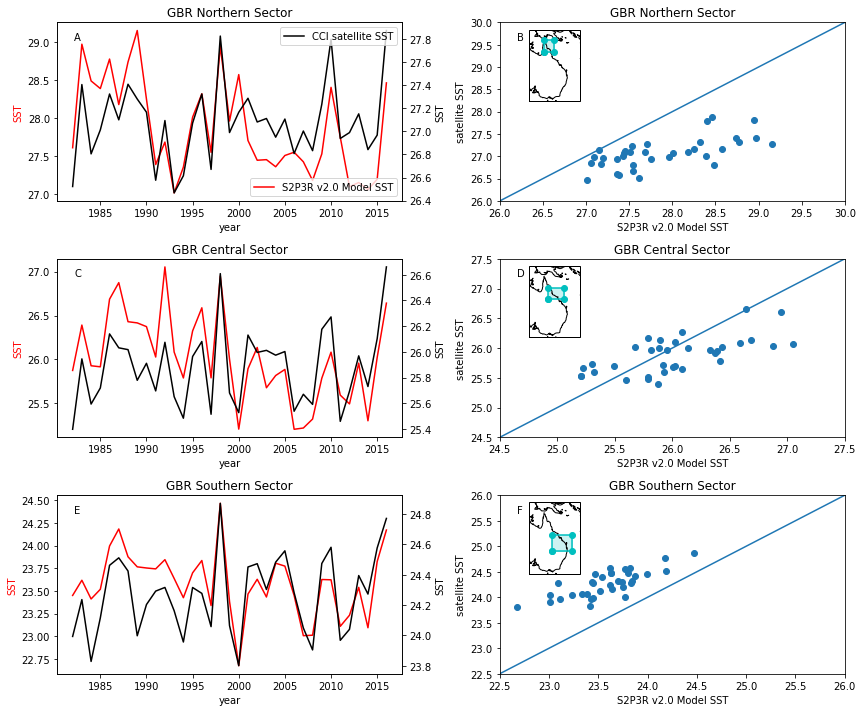

In [38]:
projection=ccrs.PlateCarree()

# my_range= [1990,2016]

def select_range(cube, my_range):
    return cube[np.where((cube.coord('year').points > my_range[0]) & (cube.coord('year').points < my_range[1]))]

lon_west = 142
lon_east = 147
lat_south = -16
lat_north = -10
cube_all_region_area_avg_1 = area_avg(extract_region(model_region_regridded,lon_west,lon_east,lat_south,lat_north))
obs_cube_all_region_area_avg_1 = area_avg(extract_region(obs_region,lon_west,lon_east,lat_south,lat_north))
lon_west = 144
lon_east = 152
lat_south = -21
lat_north = -16
cube_all_region_area_avg_2 = area_avg(extract_region(model_region_regridded,lon_west,lon_east,lat_south,lat_north))
obs_cube_all_region_area_avg_2 = area_avg(extract_region(obs_region,lon_west,lon_east,lat_south,lat_north))
lon_west = 146
lon_east = 156
lat_south = -29
lat_north = -21
cube_all_region_area_avg_3 = area_avg(extract_region(model_region_regridded,lon_west,lon_east,lat_south,lat_north))
obs_cube_all_region_area_avg_3 = area_avg(extract_region(obs_region,lon_west,lon_east,lat_south,lat_north))

# cube_all_region_area_avg_1 = select_range(cube_all_region_area_avg_1, my_range)
# cube_all_region_area_avg_2 = select_range(cube_all_region_area_avg_2, my_range)
# cube_all_region_area_avg_3 = select_range(cube_all_region_area_avg_3, my_range)

# obs_cube_all_region_area_avg_1 = select_range(obs_cube_all_region_area_avg_1, my_range)
# obs_cube_all_region_area_avg_2 = select_range(obs_cube_all_region_area_avg_2, my_range)
# obs_cube_all_region_area_avg_3 = select_range(obs_cube_all_region_area_avg_3, my_range)

fig,axes= plt.subplots(nrows=3, ncols=2,figsize=(12, 10))

yr,y1,y2 = common_years(cube_all_region_area_avg_1,obs_cube_all_region_area_avg_1)

axes[0,0].plot(yr,y1,'r',label='S2P3R v2.0 Model SST')
ax00b = axes[0,0].twinx() 
ax00b.plot(yr,y2,'k',label='CCI satellite SST')
axes[0,0].set_title('GBR Northern Sector')
axes[0,0].set_ylabel('SST', color='r') 
ax00b.set_ylabel('SST', color='k') 


axes[0,1].scatter(y1,y2,label='S2P3R v2.0 Model SST v. satellite SST')
axes[0,1].set_xlabel('S2P3R v2.0 Model SST')
axes[0,1].set_ylabel('satellite SST')
axes[0,1].plot([0,100],[0,100])
axes[0,1].set_xlim([26,30])
axes[0,1].set_ylim([26,30])
axes[0,1].set_title('GBR Northern Sector')

yr,y1,y2 = common_years(cube_all_region_area_avg_2,obs_cube_all_region_area_avg_2)

axes[1,0].plot(yr,y1,'r',label='S2P3R v2.0 Model SST')
ax10b = axes[1,0].twinx() 
ax10b.plot(yr,y2,'k',label='CCI satellite SST')
axes[1,0].set_title('GBR Central Sector')
axes[1,0].set_ylabel('SST', color='r') 
ax10b.set_ylabel('SST', color='k') 

axes[1,1].scatter(y1,y2,label='S2P3R v2.0 Model SST v. satellite SST')
axes[1,1].set_xlabel('S2P3R v2.0 Model SST')
axes[1,1].set_ylabel('satellite SST')
axes[1,1].plot([0,100],[0,100])
axes[1,1].set_xlim([24.5,27.5])
axes[1,1].set_ylim([24.5,27.5])
axes[1,1].set_title('GBR Central Sector')

yr,y1,y2 = common_years(cube_all_region_area_avg_3,obs_cube_all_region_area_avg_3)

axes[2,0].plot(yr,y1,'r',label='S2P3R v2.0 Model SST')
ax20b = axes[2,0].twinx() 
ax20b.plot(yr,y2,'k',label='CCI satellite SST')
axes[2,0].set_title('GBR Southern Sector')
axes[2,0].set_ylabel('SST', color='r') 
ax20b.set_ylabel('SST', color='k') 

axes[2,1].scatter(y1,y2,label='S2P3R v2.0 Model SST v. satellite SST')
axes[2,1].set_xlabel('S2P3R v2.0 Model SST')
axes[2,1].set_ylabel('satellite SST')
axes[2,1].plot([0,100],[0,100])
axes[2,1].set_xlim([22.5,26])
axes[2,1].set_ylim([22.5,26])
axes[2,1].set_title('GBR Southern Sector')

axes[0,0].legend(loc=4,fancybox=True)
ax00b.legend(loc=1,fancybox=True)

axes[0,0].set_xlabel('year', color='k') 
axes[1,0].set_xlabel('year', color='k') 
axes[2,0].set_xlabel('year', color='k') 


inset_x = 0
inset_y = 1
inset_size = 0.4

inset_ax1 = plt.axes([0, 0, 1, 1], projection=projection)
inset_ax1.set_extent([135, 160, -40, -5], ccrs.PlateCarree())
inset_ax1.coastlines('50m')
ip1 = InsetPosition(axes[0,1], [inset_x - inset_size*0.1,
                        inset_y - inset_size*1.1,
                        inset_size,
                        inset_size])
inset_ax1.set_axes_locator(ip1)
lon_west = 142
lon_east = 147
lat_south = -16
lat_north = -10
x, y = [lon_west, lon_west, lon_east, lon_east, lon_west], [lat_south, lat_north, lat_north, lat_south,lat_south]
inset_ax1.plot(x, y, 'c',marker='o', transform=projection)
inset_ax1.fill(x, y, color='c', transform=projection, alpha=0.2)


inset_ax2 = plt.axes([0, 0, 2, 2], projection=projection)
inset_ax2.set_extent([135, 160, -40, -5], ccrs.PlateCarree())
inset_ax2.coastlines('50m')
ip2 = InsetPosition(axes[1,1], [inset_x - inset_size*0.1,
                        inset_y - inset_size*1.1,
                        inset_size,
                        inset_size])
inset_ax2.set_axes_locator(ip2)
lon_west = 144
lon_east = 152
lat_south = -21
lat_north = -16
x, y = [lon_west, lon_west, lon_east, lon_east, lon_west], [lat_south, lat_north, lat_north, lat_south,lat_south]
inset_ax2.plot(x, y, 'c',marker='o', transform=projection)
inset_ax2.fill(x, y, color='c', transform=projection, alpha=0.2)


inset_ax3 = plt.axes([0, 0, 3, 3], projection=projection)
inset_ax3.set_extent([135, 160, -40, -5], ccrs.PlateCarree())
inset_ax3.coastlines('50m')
ip3 = InsetPosition(axes[2,1], [inset_x - inset_size*0.1,
                        inset_y - inset_size*1.1,
                        inset_size,
                        inset_size])
inset_ax3.set_axes_locator(ip3)
lon_west = 146
lon_east = 156
lat_south = -29
lat_north = -21
x3, y3 = [lon_west, lon_west, lon_east, lon_east, lon_west], [lat_south, lat_north, lat_north, lat_south,lat_south]
inset_ax3.plot(x3, y3, 'c',marker='o', transform=projection)
inset_ax3.fill(x3, y3, color='c', transform=projection, alpha=0.2)

axes[0,0].annotate('A', xy=(0.05,0.9),  xycoords="axes fraction")
axes[0,1].annotate('B', xy=(0.05,0.9),  xycoords="axes fraction")

axes[1,0].annotate('C', xy=(0.05,0.9),  xycoords="axes fraction")
axes[1,1].annotate('D', xy=(0.05,0.9),  xycoords="axes fraction")

axes[2,0].annotate('E', xy=(0.05,0.9),  xycoords="axes fraction")
axes[2,1].annotate('F', xy=(0.05,0.9),  xycoords="axes fraction")


plt.tight_layout()


plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/GBR_sst_validation1.pdf')
plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/GBR_sst_validation1.png')




In [ ]:
qplt.contourf(obs_cube_all[0])

In [ ]:

def spatial_trend(cube):
    var,lon,lat,time = cube.data,cube.coord('longitude').points,cube.coord('latitude').points,cube.coord('year').points
    cube_out = cube[0].copy()
    # def l_trend(var,lon,lat,time):
    nlon=len(lon)
    nlat=len(lat)
    nt=len(time)
    m = np.zeros([nlat,nlon])
    # c = np.zeros([nlat,nlon])
    x=np.arange(nt)
    x1 = np.c_[x, np.ones_like(x)]
    for i in range(nlat):
        r = np.linalg.lstsq(x1, var[:,i,:])[0]
        m[i,:] = r[0]
    #     c[i,:] = r[1]
    cube_out.data = m
    return cube_out

cube_out = spatial_trend(obs_cube_all)

# trend, p=l_trend(obs_cube_all.data,obs_cube_all.coord('longitude').points,obs_cube_all.coord('latitude').points,obs_cube_all.coord('year').points)

In [ ]:
fig,axes= plt.subplots(figsize=(12, 10))

qplt.contourf(cube_out,np.linspace(-0.05,0.05,21),cmap='bwr')
# plt.colorbar()

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
lon_west = 140
lon_east = 230
lat_south = -45
lat_north = 0
ax.set_extent([lon_west, lon_east, lat_south, lat_north], crs=ccrs.PlateCarree())
ax.coastlines()
ax.contourf(cube_out.coord('longitude').points,cube_out.coord('latitude').points, cube_out.data,np.linspace(-0.05,0.05,21),
            transform=ccrs.PlateCarree(),
            cmap='bwr')

In [ ]:
    
nino3 = extract_region(obs_cube_all,-150,-90,-5,5)
qplt.contourf(nino3[0])
plt.show()
    
qplt.plot(area_avg(nino3))
plt.show()
